<a href="https://colab.research.google.com/github/daniballester-ai/transferlearning-cats-and-dogs/blob/main/transferlearning_cats_and_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐾 Transfer Learning with TensorFlow: Cats vs. Dogs Classification

This project demonstrates the use of **transfer learning** 🧠 to classify images of 🐱 cats and 🐶 dogs using a pre-trained convolutional neural network (CNN). The process involves fine-tuning a base model trained on a large dataset (ImageNet) and adapting it to a new, smaller dataset.

At the end, we will test the trained model on a **Kaggle dataset** 🗂️ to evaluate its performance on unseen data.

## 🎯 Objectives
- 🚀 Utilize transfer learning to leverage the features learned by a pre-trained model.
- 🏋️ Train the model using TensorFlow's `cats_vs_dogs` dataset.
- 🔍 Test the trained model's performance on an external dataset from Kaggle.
- ✨ Apply data augmentation techniques to enhance generalization capabilities.

## 📝 Steps Overview
1. **🗂️ Data Preparation**: Load and preprocess the training dataset from TensorFlow and prepare the test dataset from Kaggle.
2. **🔧 Model Selection**: Use a pre-trained MobileNetV2 as the base model.
3. **🎨 Fine-Tuning**: Enable trainable layers in the base model to improve performance on the target dataset.
4. **📊 Evaluation**: Test the model on 10 images from each category in the Kaggle dataset and analyze its predictions.

## 🌟 Highlights
This project showcases the practical application of transfer learning in image classification tasks. By using **data augmentation** 🎭 and **fine-tuning** 🎯, the model achieves high accuracy on unseen data. The results provide insights into the model's strengths and areas for improvement.

---
Run the code 🖥️ to see the predictions and verify how well the model performs in classifying 🐱 cats and 🐶 dogs. Happy coding! 🚀


In [21]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models, applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:
# Ensure TensorFlow is using a GPU if available
print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.17.1
GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Step 1: Load and preprocess the dataset

In [3]:
# We'll use TensorFlow's "cats_vs_dogs" dataset
base_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
dataset_path = tf.keras.utils.get_file("cats_and_dogs_filtered.zip", base_url, extract=True)
base_dir = os.path.join(os.path.dirname(dataset_path), 'cats_and_dogs_filtered')

68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Define training and validation directories
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [5]:
# Training and validation subdirectories
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [7]:
# Count the number of images in each category
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))
num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

print(f"Total training cat images: {num_cats_tr}")
print(f"Total training dog images: {num_dogs_tr}")
print(f"Total validation cat images: {num_cats_val}")
print(f"Total validation dog images: {num_dogs_val}")

Total training cat images: 1000
Total training dog images: 1000
Total validation cat images: 500
Total validation dog images: 500


# Step 2: Define data generators with augmentation

In [8]:
image_size = (150, 150)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [10]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


# Step 3: Load a pre-trained model

In [11]:
base_model = applications.MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model

<ipython-input-11-94f909781494>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = applications.MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Step 4: Add custom classification layers

In [12]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Step 5: Compile the model

In [14]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Display the model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 5, 5, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

# Step 6: Train the model

In [15]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 386ms/step - accuracy: 0.6287 - loss: 0.7980 - val_accuracy: 0.9270 - val_loss: 0.2105
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 229ms/step - accuracy: 0.8510 - loss: 0.3251 - val_accuracy: 0.9430 - val_loss: 0.1556
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 221ms/step - accuracy: 0.8712 - loss: 0.2942 - val_accuracy: 0.9500 - val_loss: 0.1408
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 248ms/step - accuracy: 0.8927 - loss: 0.2677 - val_accuracy: 0.9420 - val_loss: 0.1491
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 235ms/step - accuracy: 0.8857 - loss: 0.2484 - val_accuracy: 0.9460 - val_loss: 0.1317
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 230ms/step - accuracy: 0.9027 - loss: 0.2288 - val_accuracy: 0.9500 - val_loss: 0.1350
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 231ms/step - accuracy: 0.9041 - loss: 0.2259 - val_accuracy: 0.9520 - val_loss: 0.1227
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 218ms/step - accuracy: 0.9076 - loss: 0.2098 - val_accuracy: 0.950

# Step 7: Evaluate the model

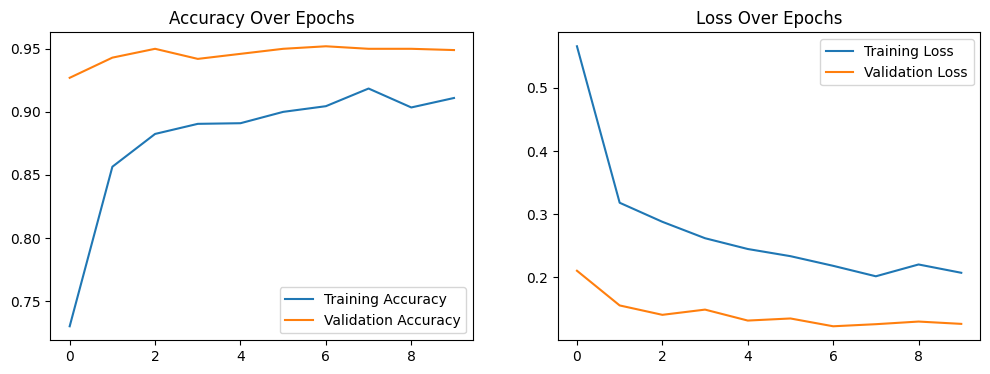

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()

# Step 8: Fine-tuning

In [17]:
# Unfreeze some layers of the base model for fine-tuning
base_model.trainable = True
fine_tune_at = 100  # Unfreeze layers starting from this point

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

In [18]:
# Compile the model again after unfreezing layers
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [19]:
# Fine-tune the model
fine_tune_epochs = 5
total_epochs = 10 + fine_tune_epochs

history_fine = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=total_epochs,
    initial_epoch=10
)

Epoch 11/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 46s 408ms/step - accuracy: 0.7178 - loss: 0.5427 - val_accuracy: 0.9560 - val_loss: 0.1128
Epoch 12/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 225ms/step - accuracy: 0.8557 - loss: 0.3325 - val_accuracy: 0.9540 - val_loss: 0.1099
Epoch 13/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 224ms/step - accuracy: 0.8861 - loss: 0.2872 - val_accuracy: 0.9550 - val_loss: 0.1095
Epoch 14/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 225ms/step - accuracy: 0.8962 - loss: 0.2730 - val_accuracy: 0.9540 - val_loss: 0.1077
Epoch 15/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 224ms/step - accuracy: 0.8955 - loss: 0.2509 - val_accuracy: 0.9550 - val_loss: 0.1072


In [20]:
# Final evaluation and saving the model
model.save('cats_vs_dogs_model.h5')
print("Model saved as cats_vs_dogs_model.h5")

Model saved as cats_vs_dogs_model.h5


# Step 9: Test the model on new data (Kaggle Dataset)

In [22]:
import zipfile
import shutil

In [23]:
# Download and extract the Kaggle dataset
dataset_url = "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip"
dataset_zip = tf.keras.utils.get_file("kagglecatsanddogs_5340.zip", dataset_url, extract=False)
dataset_extract_path = os.path.join(os.path.dirname(dataset_zip), "kagglecatsanddogs")

824887076/824887076 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step


In [24]:
# Extract the dataset if not already done
if not os.path.exists(dataset_extract_path):
    with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
        zip_ref.extractall(dataset_extract_path)

# Define the test directory
kaggle_test_dir = os.path.join(dataset_extract_path, "PetImages")

In [25]:
# Remove corrupted files
for category in ["Cat", "Dog"]:
    category_path = os.path.join(kaggle_test_dir, category)
    for file in os.listdir(category_path):
        file_path = os.path.join(category_path, file)
        try:
            img = load_img(file_path)
        except (OSError, IOError):
            os.remove(file_path)

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


# Step 10: Predict on the first 10 images from each category

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


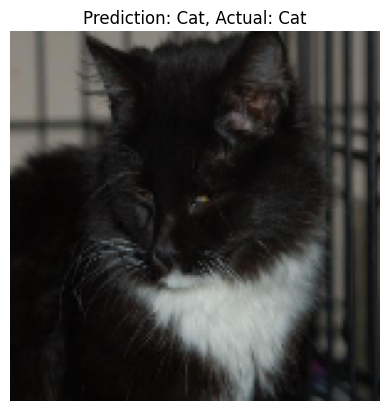

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


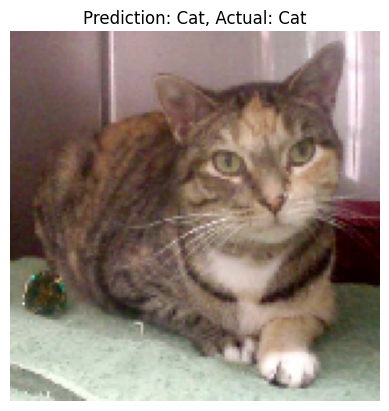

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


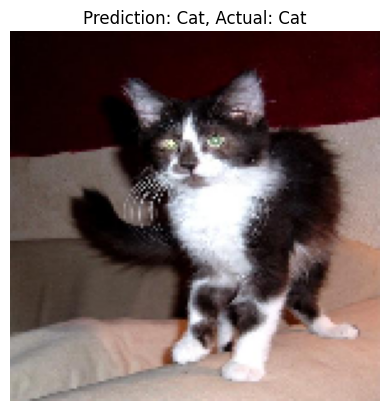

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


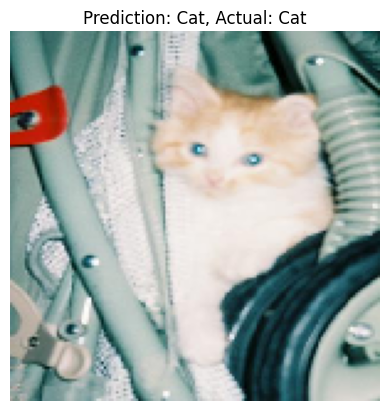

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


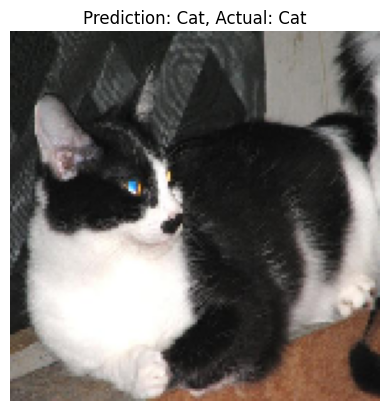

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


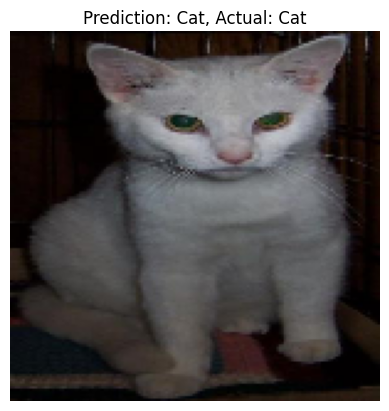

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


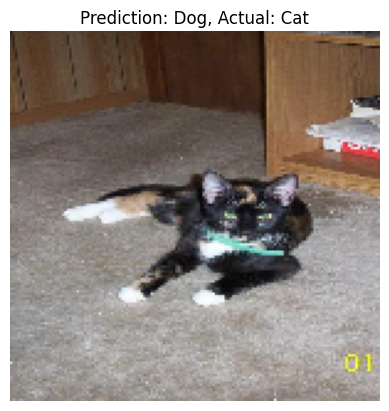

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


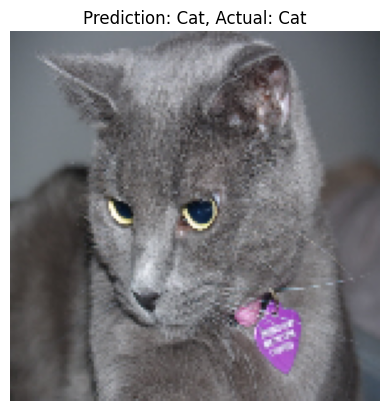

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


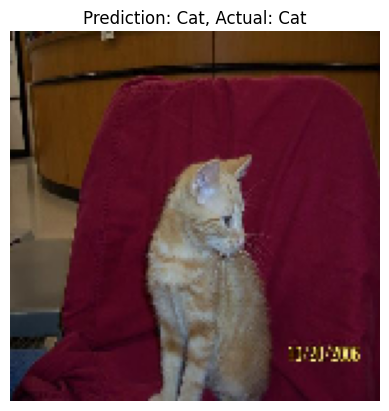

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


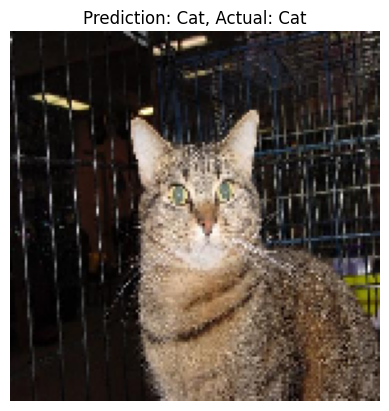

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


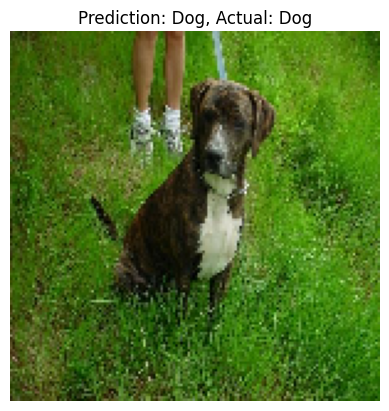

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


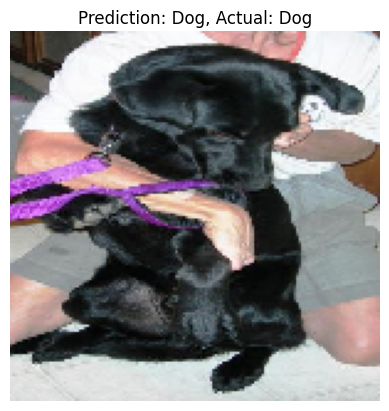

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


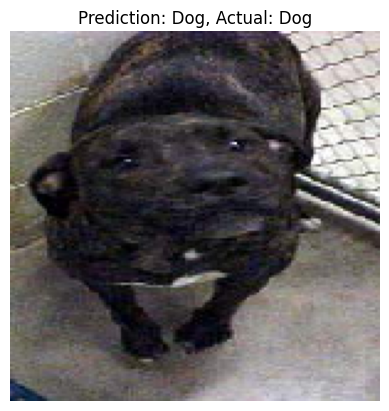

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


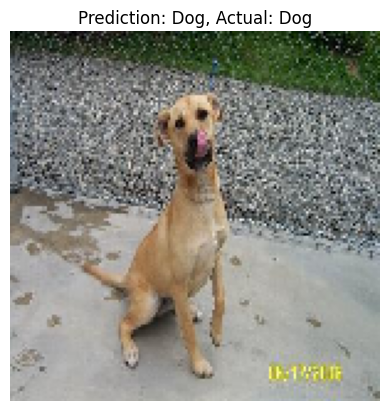

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


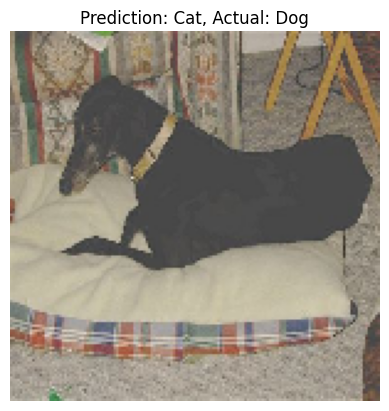

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


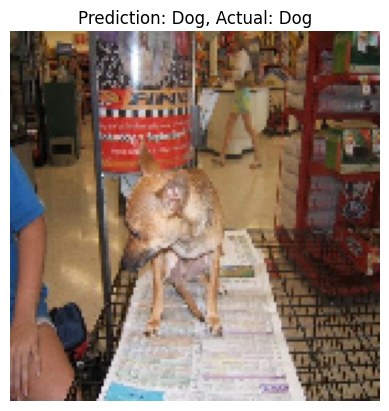

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


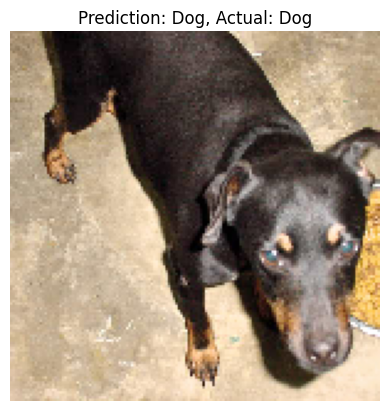

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


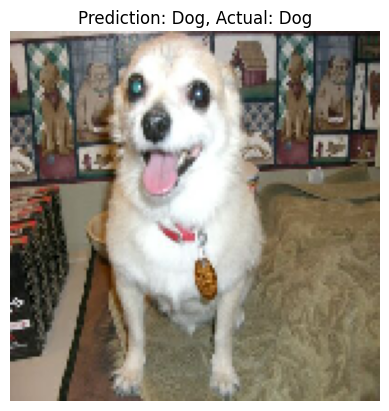

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


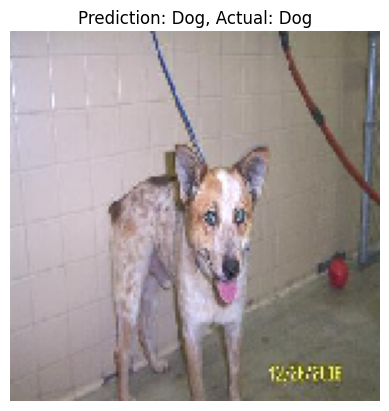

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


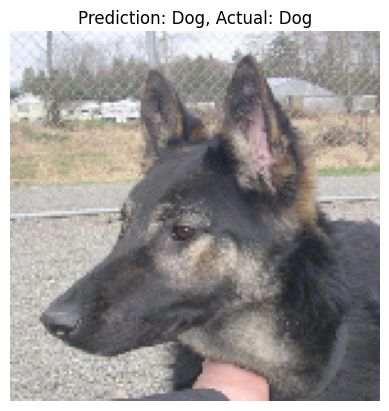

In [26]:
categories = ["Cat", "Dog"]
for category in categories:
    category_path = os.path.join(kaggle_test_dir, category)
    category_images = os.listdir(category_path)[:10]  # Get first 10 images

    for image_name in category_images:
        image_path = os.path.join(category_path, image_name)
        img = load_img(image_path, target_size=image_size)
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        prediction = model.predict(img_array)
        class_name = "Dog" if prediction > 0.5 else "Cat"

        plt.imshow(img)
        plt.title(f"Prediction: {class_name}, Actual: {category}")
        plt.axis('off')
        plt.show()